# Udacity Data Analytics Nanodegree

# Project: Investigate a Dataset : Football Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

                                                                                        Author:David Ugochukwu Asogwa
                                                                                        Submitted on: May 30, 2022

<a id='intro'></a>
## Introduction

The dataset to be analysed is a football database. This data is obtained from kaggle (a database containing different sets and types of data for machine learning and data analysis). It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. Contained in this database are the following csv files:
1. Countries: Names of different countries whose with their ID(England, Germany, Italy, etc, the rest will be seen during analysis.),
2. Leagues: The leagues of the countries listed in 1 above (English Premier League in England, Germany 1 Bundesliga in Germany, Italy Serie A in Italy, etc),
3. Player: Contains players details such as name, date of birth, height and weight.
4. Player_attributes: Shows the characteristics of different players in the leagues. These characteristics includes if the player is left or right footed, players overall rating, defence and attacking rate and so much more.
5. Match: Gives details about matches played between 2008 and 2016 (grouped in seasons), and also the number of goals scored, either scored by the home team or the away team.
6. Team: Contains selected names of clubs participating in each of the Europian leagues listed in 1, with their short names and club ID.
7. Team_attributes: This file shows the different characteristics of each team in general. Their build up play pattern, team composure in general, defence mindset, chances created and passing too.

### Columns contained includes:
1. Player name: shows the name of players
2. Country: Countries whose leagues were listed
3. League: Leagues played in the listed countries
4. Clubs: Name of clubs participating in the leagues
5. Penalties: Number of penalties played by a player
6. Home team goal: Goals scored by the home team per match
7. Away team goal: Goals scored by the away team per match
.
.
. and lots more. The colmns are enormous to be listed here.


Exploratory analysis will be carried out on these provided dataset and visuals used to communicate results obtained during this process. The following research questions will be answered during the course of exploring these data to obtain insite on the Europian league:
1. Which team(s) had the best build up play?
2. which team(s) had the worst build up play?
3. Player(s) with most penalties
4. Player(s) with least number of penalties
5. Percentage of left footed players compared to right footed players
6. League with most home goal
7. League with most away goal

In [1]:
# Importing Jupyter packages to be used
# Packages include pandas, numpy, seaborn and matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

In this section, all data needed will be loaded, inspected for missing values which will be replaced with the mean data or totally removed from the dataset.

### Loading all data required

In [2]:
# Reading csv files
# All csv files have been renamed using lower case letters for consistency

country = pd.read_csv('country.csv')
league = pd.read_csv('league.csv')
match = pd.read_csv('match.csv')
player = pd.read_csv('player.csv')
player_att = pd.read_csv('player_attributes.csv')
team = pd.read_csv('team.csv')
team_att = pd.read_csv('team_attributes.csv')

### Printing and inspecting
In this sub-section, few lines from each data will be printed for inspection of column names. Also data types and sizes will be inspected.

In [3]:
# Displaying few rows for inspection
country.head(2)

,id,name
0,1,Belgium
1,1729,England


In [4]:
# Displaying few rows for inspection
league.head(2)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


In [5]:
# Displaying few rows for inspection
match.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6


In [6]:
# Displaying few rows for inspection
player.head(2)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146


In [7]:
# Displaying few rows for inspection
player_att.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [8]:
# Displaying few rows for inspection
team.head(2)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC


In [9]:
# Displaying few rows for inspection
team_att.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


### Null values, Data size and Data types
This will be excuted using the ".info()" and ".shape" keywords. In this part, the null values in the dataset will be explored (as will be displayed from the data info) for possible removal or replacement with the mean values, and data types for possible conversion, if need be.
It should be noted that some columns will be dropped if they dont't contribute to answering the questions asked
Also null values might be dropped too, instead of being replaced


In [10]:
print(country.shape) # Print size of data set
country.info() #Print data set information

(11, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


This dataset appears to have all data complete, none missing

In [11]:
print(team.shape) #Print size of dataset
team.info() # the rows with missing values will be dropped (team_fifa_api_id)

(299, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [12]:
# Exploring more on the missing data from team
team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

There are 11 missing values from team_fifa_api_id. These values are definitely unique and cannot be randomly replaced with mean values, thus the entire column will be removed during data cleaning.

In [13]:
# Exploring the data in team attributes
print(team_att.shape)
team_att.info()

(1458, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingCl

In [14]:
# Exploring team_attributes to get the number of missing values
team_att.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

From the table in .head above for team_attributes, it can be seen that the buildUpPlayDribbling is missing values for buildUpPlayDribblingClass "little". Thus this column will be removed as the values have no relationship to our questions, instead we can use the class which is more explicit in understanding how the teams build up their play.

In [15]:
print(match.shape)

match.info()

(25979, 115)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


null rows will be removed too, but in this case, seems like removing the columns entirely will be the best option as the do
not contribute to answerinf the questions posed and also are very large in number and will affect the data size and viability
if only the rows are removed.

In [16]:
#Checking for null values
match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

There seem to be a lot of columns in this dataset and a lot of missing values. Gracefully, the columns with missing values are not important in our analysis, thus they will be removed from dataset during the cleaning process.

In [17]:
print(league.shape)
league.info()

(11, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [18]:
print(player.shape)
player.info()

(11060, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [19]:
print(player_att.shape)
player_att.info()

(183978, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curv

In [20]:
# Further exploration to get actual missing valuess

player_att.isnull().sum()/player_att.shape[0]*100

id                     0.000000
player_fifa_api_id     0.000000
player_api_id          0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
defensive_work_rate    0.454402
crossing               0.454402
finishing              0.454402
heading_accuracy       0.454402
short_passing          0.454402
volleys                1.474633
dribbling              0.454402
curve                  1.474633
free_kick_accuracy     0.454402
long_passing           0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
agility                1.474633
reactions              0.454402
balance                1.474633
shot_power             0.454402
jumping                1.474633
stamina                0.454402
strength               0.454402
long_shots             0.454402
aggression             0.454402
interceptions          0.454402
position

In these particluar dataset, most of the columns with missing values are important in answering our questions and making conclusions. Therefore, these values will be replaced with the mean values.

In [21]:
# Checking description of player_attributes which includes the count, mean, standard deviation and percentiles as shown below.
# Minimum and maximum values included too.

player_att.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


The ".describe()" keyword only carrys out these operations in columns with numeraical values (data types float and int).

### Creating Duplicates for Trimming

In [22]:
df1 = country.copy()     # duplicate copy for country
df2 = league.copy()      # duplicate copy for league
df3 = match.copy()       # duplicate copy for match
df4 = player.copy()      # duplicate copy for players
df5 = player_att.copy()  # duplicate copy for player attributes
df6 = team.copy()        # duplicate copy for team
df7 = team_att.copy()    # duplicate copy for team attributes

In [23]:
# Visualising a copied data for verification

df1

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


Perfect!!!

### Data Cleanning
At this stage, the datasets have been explored, missing values checked, data sizes and data types also explored. It is time to clean up the datasets by removing unwanted columns and rows or replacing rows with missing values with the mean values (if need be). Copies of the datasets have been made in an earlier step. Different datasets (if not all) will be merged (concatenated) in order to help in drawing meaningful conclusions and giving a better clarity

In [24]:
df2.head(2)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


In [25]:
# No columns will be dropped in country as the ID and name are needed for analyses and merging

df2_mod = df2.drop(columns = ['id'])

In [26]:
# We have to rename the league from "name" to "league" for ease of understanding, merging files and analysis

df2_mod.rename(columns = {'name':'league'}, inplace = True)

In [27]:
# Check if removed
df2_mod.head(2)

,country_id,league
0,1,Belgium Jupiler League
1,1729,England Premier League


In [28]:
# The following columns will be dropped from the match dataset since they are not usefull in answering our questions
# The league_id will also dropped because it is the same as country_id

A3 = df3.drop(columns = ['home_player_X1','home_player_X2','home_player_X3','home_player_X4','home_player_X5','home_player_X6','home_player_X7','home_player_X8','home_player_X9','home_player_X10','home_player_X11'])
B3 = A3.drop(columns = ['home_player_Y1','home_player_Y2','home_player_Y3','home_player_Y4','home_player_Y5','home_player_Y6','home_player_Y7','home_player_Y8','home_player_Y9','home_player_Y10','home_player_Y11'])
C3 = B3.drop(columns = ['away_player_X1','away_player_X2','away_player_X3','away_player_X4','away_player_X5','away_player_X6','away_player_X7','away_player_X8','away_player_X9','away_player_X10','away_player_X11'])
D3 = C3.drop(columns = ['away_player_Y1','away_player_Y2','away_player_Y3','away_player_Y4','away_player_Y5','away_player_Y6','away_player_Y7','away_player_Y8','away_player_Y9','away_player_Y10','away_player_Y11'])
E3 = D3.drop(columns = ['home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11'])
F3 = E3.drop(columns = ['away_player_1','away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11'])
G3 = F3.drop(columns = ['goal','shoton','shotoff','foulcommit','card','cross','corner','possession','B365H','B365D','B365A','BWH','BWD','BWA','IWH','IWD','IWA','LBH','LBD','LBA','PSH','PSD','PSA'])
df3_mod = G3.drop(columns = ['WHH','WHD','WHA','SJH','SJD','SJA','VCH','VCD','VCA','GBH','GBD','GBA','BSH','BSD','BSA','match_api_id','id','league_id'])

df3_mod.head(2)

,country_id,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,2008/2009,1,2008-08-17 00:00:00,9987,9993,1,1
1,1,2008/2009,1,2008-08-16 00:00:00,10000,9994,0,0


In [29]:
# lets check for null values in the new copy using percentage
# Percentage is used because we can actually deduce from it if we can remove or replace the rows

df3_mod.isnull().sum()/df3_mod.shape[0]*100

country_id          0.0
season              0.0
stage               0.0
date                0.0
home_team_api_id    0.0
away_team_api_id    0.0
home_team_goal      0.0
away_team_goal      0.0
dtype: float64

Cool !!!

Having successfully removed unwanted columns and no null data in the data, let's now merge (combine) the matches and the league. This is to be able to select which match was played in which league. This merging will be done using the country_id.

In [30]:
# merging files df3_mod(Cleaned match data) and df2_mod (cleaned league data)

df_x = df3_mod.merge(df2_mod, how = 'outer')
df_x

,country_id,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league
0,1,2008/2009,1,2008-08-17 00:00:00,9987,9993,1,1,Belgium Jupiler League
1,1,2008/2009,1,2008-08-16 00:00:00,10000,9994,0,0,Belgium Jupiler League
2,1,2008/2009,1,2008-08-16 00:00:00,9984,8635,0,3,Belgium Jupiler League
3,1,2008/2009,1,2008-08-17 00:00:00,9991,9998,5,0,Belgium Jupiler League
4,1,2008/2009,1,2008-08-16 00:00:00,7947,9985,1,3,Belgium Jupiler League
...,...,...,...,...,...,...,...,...,...
25974,24558,2015/2016,9,2015-09-22 00:00:00,10190,10191,1,0,Switzerland Super League
25975,24558,2015/2016,9,2015-09-23 00:00:00,9824,10199,1,2,Switzerland Super League
25976,24558,2015/2016,9,2015-09-23 00:00:00,9956,10179,2,0,Switzerland Super League
25977,24558,2015/2016,9,2015-09-22 00:00:00,7896,10243,0,0,Switzerland Super League


Excellent !!! Let's move on.

In [31]:
# Checking for null values still

df_x.isnull().sum()

country_id          0
season              0
stage               0
date                0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
league              0
dtype: int64

Correct !!!

Now let's add the countries in this data set. This is to enable us know which country owns which league, and also b able to find usable informations from the countries leagues. In order to do this, let's rename the "id" in country to "country_id", and "name" in country to "country_name" for ease of merging.

In [32]:
# Renaming id and name
df1.rename(columns = {'id':'country_id','name':'country_name'}, inplace = True)

In [33]:
# Check
df1.head(2)

,country_id,country_name
0,1,Belgium
1,1729,England


In [34]:
# Merging files

df_dat = df_x.merge(df1, how = 'outer')
df_dat.head(2)

,country_id,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,league,country_name
0,1,2008/2009,1,2008-08-17 00:00:00,9987,9993,1,1,Belgium Jupiler League,Belgium
1,1,2008/2009,1,2008-08-16 00:00:00,10000,9994,0,0,Belgium Jupiler League,Belgium


Now we can see the leagues and the country they belong to at a go, the goals scored by the teams (home and away) ib each league per season and the season's too, with their dates and year. Cool!!!

In [35]:
print(df_dat.shape) # print size of dataset

# Checking for duplicate values:
df_dat_dup = df_dat.duplicated()
df_dat_dup.sum()

(25979, 10)


0

There are no duplicated values.

In [36]:
# Checking unique values
df_dat.nunique().sum()

2392

Next, lets clean the player and player_attributes datasets

In [37]:
# The columns birthday, id, and player_fifa_api_id will be removed.
df4_mod = df4.drop(columns = ['birthday','player_fifa_api_id','id'])
print(df4_mod.shape)
df4_mod.head()

(11060, 4)


,player_api_id,player_name,height,weight
0,505942,Aaron Appindangoye,182.88,187
1,155782,Aaron Cresswell,170.18,146
2,162549,Aaron Doran,170.18,163
3,30572,Aaron Galindo,182.88,198
4,23780,Aaron Hughes,182.88,154


In [38]:
df4_mod.isnull().sum() #checks

player_api_id    0
player_name      0
height           0
weight           0
dtype: int64

Now we go into player attributes

In [39]:
# Removing columns not important in the analysis

A5 = df5.drop(columns = ['gk_reflexes','gk_positioning','gk_kicking','gk_handling','gk_diving','sliding_tackle','standing_tackle','marking','curve','free_kick_accuracy','acceleration','long_passing','heading_accuracy','short_passing','player_fifa_api_id'])
df5_mod = A5.drop(columns = ['vision','positioning','interceptions','aggression','long_shots','strength','stamina','jumping','shot_power','balance','reactions','agility','sprint_speed','ball_control','crossing','volleys','dribbling','defensive_work_rate'])


df5_mod.head()

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,finishing,penalties
0,1,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,44.0,48.0
1,2,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,44.0,48.0
2,3,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,44.0,48.0
3,4,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,43.0,47.0
4,5,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,43.0,47.0


Now lets check for null values in percent to know if to remove the rows or not

In [40]:
df5_mod.isnull().sum()/df5_mod.shape[0]*100

id                     0.000000
player_api_id          0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
finishing              0.454402
penalties              0.454402
dtype: float64

The percentages of the null values are quite low, thus we can drop those rows without having any heavy effect on the results from the data. But is this true? what if majority of the missing data is from one league? Let's do some checks !!!

In [41]:
# lets check the number of times each attacking work rate appeared in the dataset
# We will achieve this using value_counts()

df5_mod.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

There's a problem here, there are also some rows containing jumbled data like "y", "le", "stoc", and "norm", which actually seems useless. "Norm" kind of sounds like "Normal" but still doesn't correlate when we have "high", "medium" and "low".

Continuing checks.

In [42]:
# First, set index to attacking_work_rate
df5_mod_v1 = df5_mod.set_index('attacking_work_rate')

# Check if it changed
df5_mod_v1.head()

,id,player_api_id,date,overall_rating,potential,preferred_foot,finishing,penalties
attacking_work_rate,,,,,,,,
medium,1,505942,2016-02-18 00:00:00,67.0,71.0,right,44.0,48.0
medium,2,505942,2015-11-19 00:00:00,67.0,71.0,right,44.0,48.0
medium,3,505942,2015-09-21 00:00:00,62.0,66.0,right,44.0,48.0
medium,4,505942,2015-03-20 00:00:00,61.0,65.0,right,43.0,47.0
medium,5,505942,2007-02-22 00:00:00,61.0,65.0,right,43.0,47.0


In [43]:
# data selection using loc
df5_mod_v1.loc[['y','le','stoc','norm']]

,id,player_api_id,date,overall_rating,potential,preferred_foot,finishing,penalties
attacking_work_rate,,,,,,,,
y,30957,30695,2011-02-22 00:00:00,74.0,81.0,right,13.0,26.0
y,30958,30695,2010-08-30 00:00:00,73.0,81.0,right,13.0,26.0
y,30959,30695,2010-02-22 00:00:00,78.0,88.0,right,21.0,82.0
y,30960,30695,2009-08-30 00:00:00,80.0,89.0,right,21.0,82.0
y,30961,30695,2008-08-30 00:00:00,79.0,89.0,right,21.0,82.0
...,...,...,...,...,...,...,...,...
norm,180989,39984,2010-08-30 00:00:00,62.0,64.0,right,46.0,54.0
norm,180990,39984,2010-02-22 00:00:00,56.0,61.0,right,55.0,45.0
norm,180991,39984,2009-08-30 00:00:00,57.0,63.0,left,57.0,47.0


Hmmmmmmmm!!! Seems there's another problem here. Looking at the player_api_id, it appears these problems are consistent with certain players, which means removing them will totally eliminate those players, and same goes for null values too. Let's replace them with "medium". This will be achieved using ".replace".

In [44]:
# replacing y, le, stoc and norm with medium
df5_mod['attacking_work_rate'].replace({'y':'medium','le':'medium','stoc':'medium','norm':'medium'}, inplace = True)

# Replacing 'None' with lower case 'none' for consistency
df5_mod['attacking_work_rate'].replace({'None':'none'}, inplace = True)

# checking to know if it worked
df5_mod.attacking_work_rate.value_counts()

medium    125717
high       42823
low         8569
none        3639
Name: attacking_work_rate, dtype: int64

Good!

In [45]:
# Re-checking null values for replacing
df5_mod.isnull().sum()

id                        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
finishing               836
penalties               836
dtype: int64

In [46]:
# Checking datatype of null values
df5_mod.dtypes

id                       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
finishing              float64
penalties              float64
dtype: object

The attributes with int and float data types will be replaced with their mean values, while those with objects(string) will be replaced with the most occuring value.

First, we will replace preferred_foot and attacking_work_rate. To do this, we count the most preferred foot(right or left) and replace with highest occurrenc. Same will be done for attacking work rate.

In [47]:
# Counting preferred foot
df5_mod.preferred_foot.value_counts()

right    138409
left      44733
Name: preferred_foot, dtype: int64

In [48]:
# Replace with "right"
df5_mod["preferred_foot"].fillna("right", inplace = True)

# Check for change in count to know if replaced
df5_mod.preferred_foot.value_counts()

right    139245
left      44733
Name: preferred_foot, dtype: int64

Good. Now let's do same for attacking work rate. Since we know medium is highest here (already counted above), we replace with medium.

In [49]:
# Replace with "right"
df5_mod["attacking_work_rate"].fillna("medium", inplace = True)

# Check for change in count to know if replaced
df5_mod.attacking_work_rate.value_counts()

medium    128947
high       42823
low         8569
none        3639
Name: attacking_work_rate, dtype: int64

Now let's replace other values with their mean

In [50]:
# Replacing null values in overall rating
df5_mod = df5_mod.fillna(df5_mod.overall_rating.mean())

# Replacing null values in potential
df5_mod = df5_mod.fillna(df5_mod.potential.mean())

# Replacing null values in finishing
df5_mod = df5_mod.fillna(df5_mod.finishing.mean())

# Replacing null values in penalties
df5_mod = df5_mod.fillna(df5_mod.penalties.mean())

# This can be done with just a single line of code. It replaces all null values in a column with their mean, but slow in execution
#df5_mod = df5_mod.fillna(df5_mod.mean())

# Re-checking for null values
df5_mod.isnull().sum()

id                     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
finishing              0
penalties              0
dtype: int64

Perfecta!!!

Since we have removed data not needed from player attributes, let us now merge the player's with their attributes. This merging will be done using the "player_api_id", though it can also with "player_fifa_api_id". These two data are merged in order to determine which player has which attributes as: which players are left footed, right footed or has medium work rate.

In [51]:
# Merging players and player attributes

df_dat1 = df5_mod.merge(df4_mod, left_on='player_api_id', right_on='player_api_id')

In [52]:
# checking for merged data
df_dat1.head(10)

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,finishing,penalties,player_name,height,weight
0,1,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,44.0,48.0,Aaron Appindangoye,182.88,187
1,2,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,44.0,48.0,Aaron Appindangoye,182.88,187
2,3,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,44.0,48.0,Aaron Appindangoye,182.88,187
3,4,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,43.0,47.0,Aaron Appindangoye,182.88,187
4,5,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,43.0,47.0,Aaron Appindangoye,182.88,187
5,6,155782,2016-04-21 00:00:00,74.0,76.0,left,high,53.0,59.0,Aaron Cresswell,170.18,146
6,7,155782,2016-04-07 00:00:00,74.0,76.0,left,high,53.0,59.0,Aaron Cresswell,170.18,146
7,8,155782,2016-01-07 00:00:00,73.0,75.0,left,high,52.0,59.0,Aaron Cresswell,170.18,146
8,9,155782,2015-12-24 00:00:00,73.0,75.0,left,high,51.0,59.0,Aaron Cresswell,170.18,146
9,10,155782,2015-12-17 00:00:00,73.0,75.0,left,high,51.0,59.0,Aaron Cresswell,170.18,146


In [53]:
# Are there null values?
df_dat1.isnull().sum()

id                     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
finishing              0
penalties              0
player_name            0
height                 0
weight                 0
dtype: int64

Now lets take a look at the team and team attributes dataset, and clean off details that are not needed, fill or remove null values and probably merge it with another dataset.


Working on team dataset

In [54]:
df6 #This is a copye made from previous steps

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [55]:
# removing null values from team
# There are eleven missing values from team_fifa_api_id (explored before this stage), thus this column will be dropped
# team short name will also be removed since theam long name is already there

df6_mod = df6.drop(columns = ['team_fifa_api_id','team_short_name'], inplace = False)

#Checking if removed
df6_mod.head()

,id,team_api_id,team_long_name
0,1,9987,KRC Genk
1,2,9993,Beerschot AC
2,3,10000,SV Zulte-Waregem
3,4,9994,Sporting Lokeren
4,5,9984,KSV Cercle Brugge


In [56]:
# Checking for null values
df6_mod.isnull().sum()

id                0
team_api_id       0
team_long_name    0
dtype: int64

Working on team attributes

In [57]:
df7.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [58]:
# Removing columns not needed to answer questions
A7 = df7.drop(columns = ['team_fifa_api_id','buildUpPlayDribbling','buildUpPlaySpeedClass','buildUpPlayDribblingClass','buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationPassingClass','defenceTeamWidthClass'])
df7_mod = A7.drop(columns = ['id','chanceCreationCrossingClass','chanceCreationShootingClass','chanceCreationPositioningClass','defencePressureClass','defenceAggressionClass','defenceTeamWidth','defenceDefenderLineClass'])
df7_mod.isnull().sum()

team_api_id               0
date                      0
buildUpPlaySpeed          0
buildUpPlayPassing        0
chanceCreationPassing     0
chanceCreationCrossing    0
chanceCreationShooting    0
defencePressure           0
defenceAggression         0
dtype: int64

In [59]:
# Merging files

df_dat2 = df6_mod.merge(df7_mod, left_on='team_api_id', right_on='team_api_id')

Now we have three new sets of datasets:
1. df_dat: Contains details about country, leagues played, goals score on each match day and match dates
2. df_dat1: Contains informations about players: their name, preferred foot, penalties taken, potential and api_id.
3. df_dat3: Contains team informations and their attributes.

These data will be saved and used for exploratory analysis

In [60]:
# Saving files (Not really necessary)
#df_dat.to_csv('country_league.csv', index = False)
#df_dat1.to_csv('players_info.csv', index = False)
#df_dat2.to_csv('teams_info.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis



### 1. Which team(s) had the best build up play?

In [61]:
df_dat2.describe()

,id,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,22692.858711,9995.727023,52.462277,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029
std,15015.159107,13264.869900,11.545869,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028
min,1.000000,1601.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000
25%,9547.250000,8457.750000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000
50%,20524.500000,8674.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000
75%,35294.000000,9904.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000
max,50204.000000,274581.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000


In [62]:
# grouping data sets
check = df_dat2.groupby('team_long_name')['buildUpPlaySpeed'].sum()
check

team_long_name
1. FC Kaiserslautern        307
1. FC Köln                  344
1. FC Nürnberg              272
1. FSV Mainz 05             371
AC Ajaccio                  361
                           ... 
Xerez Club Deportivo        190
Zagłębie Lubin              208
Zawisza Bydgoszcz           108
Évian Thonon Gaillard FC    260
Śląsk Wrocław               304
Name: buildUpPlaySpeed, Length: 285, dtype: int64

In [63]:
# Getting the team with best build up play and the sum
best = df_dat2.groupby('team_long_name')['buildUpPlaySpeed'].sum()
best.max(), df_dat2.team_long_name.max()

(522, 'Śląsk Wrocław')

### 2.  Which team(s) had the worst build up play?

In [64]:
worst = df_dat2.groupby('team_long_name')['buildUpPlaySpeed'].sum()
worst.min(), df_dat2.team_long_name.min()

(30, '1. FC Kaiserslautern')

### 3.  Which player(s) had the most penalties

In [65]:
df_dat1.head()

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,finishing,penalties,player_name,height,weight
0,1,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,44.0,48.0,Aaron Appindangoye,182.88,187
1,2,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,44.0,48.0,Aaron Appindangoye,182.88,187
2,3,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,44.0,48.0,Aaron Appindangoye,182.88,187
3,4,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,43.0,47.0,Aaron Appindangoye,182.88,187
4,5,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,43.0,47.0,Aaron Appindangoye,182.88,187


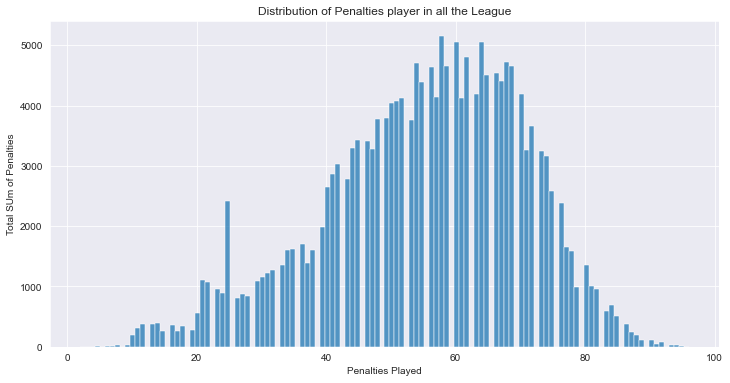

In [66]:
# Using seaborn to plot the penalty disribution
plt.figure(figsize = (12,6));
sns.histplot(df_dat1.penalties);
plt.title('Distribution of Penalties player in all the League');
plt.xlabel('Penalties Played');
plt.ylabel('Total SUm of Penalties');

The plot above shows the distribution of the number of penalties played. From this, it can be seen that on average, between 45 to 65 penalties were played between 2008 to 2016. We can also use the describe function to explore more on this.

In [67]:
df_dat1.penalties.describe()

count    183978.000000
mean         55.065767
std          15.538086
min           2.000000
25%          45.000000
50%          57.000000
75%          67.000000
max          96.000000
Name: penalties, dtype: float64

From this, we can see the minimum and maximum penalty played, the median and also the mean penalties.

In [68]:
# Finding the player with most penalty and the date
# First we group by player name and date, then find the max penalty

most_pen = df_dat1.groupby(['date','player_name'])['penalties'].max()
most_pen.max(), df_dat1.date.max(), df_dat1.player_name.max()

(96.0, '2016-07-07 00:00:00', 'dos Santos Fabio Junior')

It can be seen that Dos Santos Fabio Junior had the most penalties in the 2016. Played 96 penalties

### 4.  Which player(s) had the least penalties

In [69]:
# FInding player with least penalties
# It follows same pattern as maximum, aside that we use minimum here

least_pen = df_dat1.groupby(['date','player_name'])['penalties'].min()
least_pen.min(), df_dat1.date.min(), df_dat1.player_name.min()

(2.0, '2007-02-22 00:00:00', 'Aaron Appindangoye')

### 5. Percentage of left footed players as compared to right footed players

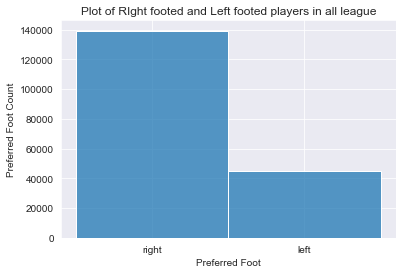

In [70]:
# We can achieve this by using seaborn to visualize the plot
sns.histplot(df_dat1.preferred_foot);
plt.title('Plot of RIght footed and Left footed players in all league');
plt.xlabel('Preferred Foot');
plt.ylabel('Preferred Foot Count');

From the plot, it is evident that right footed players are way more than left footed players.

We can also represent this in a box plot as shown below:

In [71]:
#This function takes in a numerical variable and returns a boxplot of its distribution

def unibox(df, var_name):
    sns.boxplot(data = df, y = var_name)

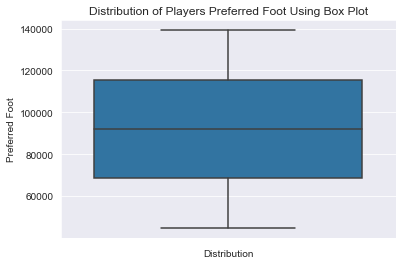

In [72]:
unibox(df_dat1, df_dat1.preferred_foot.value_counts());
plt.title('Distribution of Players Preferred Foot Using Box Plot');
plt.xlabel('Distribution');
plt.ylabel('Preferred Foot');

The box plot shows a distribution of players preferred foot. It shows the 25th percentile, the mean, median, the 75th percentile and the maximum value distributions.

### 6. League that scored the highest home goal

In [73]:
most_goals_home = df_dat.groupby(['country_name','league'])[['home_team_goal']].sum()
most_goals_home

,,home_team_goal
country_name,league,
Belgium,Belgium Jupiler League,2781
England,England Premier League,4715
France,France Ligue 1,4265
Germany,Germany 1. Bundesliga,3982
Italy,Italy Serie A,4528
Netherlands,Netherlands Eredivisie,4357
Poland,Poland Ekstraklasa,2678
Portugal,Portugal Liga ZON Sagres,2890
Scotland,Scotland Premier League,2607


From the above data, the total number of goals scored by each league have been explored. It can be seen that the Spain LIGA BBVA has the most number of goals scored in all European leagues: 4959 goals

Lets visualize this!!!

First, lets create a function that will plot the graph, since we wil be using it again.

In [74]:
# Function to plot bar chart using inputed data
def bar_plot(x_axis_data, y_axis_data, title, x_label, y_label):
    plt.figure(figsize = (7,7));
    plt.bar(x_axis_data, y_axis_data);
    plt.xticks(rotation = 90);
    plt.title(title);
    plt.xlabel(x_label);
    plt.ylabel(y_label)

The function created is bar_plot and takes in five (5) vairables: x_axis_data, y_axis_data, title, x_label and y_label. The x and y axis data are to be plotted. The title is a string and when inputting, should be in parenthesis. Example: 'Left footed players'. Same goes with x_label and y_label.

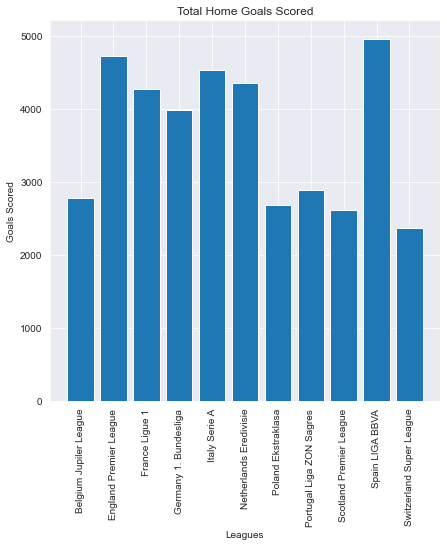

In [75]:
league = ['Belgium Jupiler League','England Premier League','France Ligue 1','Germany 1. Bundesliga','Italy Serie A','Netherlands Eredivisie','Poland Ekstraklasa','Portugal Liga ZON Sagres','Scotland Premier League','Spain LIGA BBVA','Switzerland Super League'];
bar_plot(league, most_goals_home.home_team_goal, 'Total Home Goals Scored', 'Leagues', 'Goals Scored');


From the bar chart above, it can be seen that Spain LIGA BBVA scored the most number of goals.

### 7. League that scored the highest away goal

In [76]:
most_goals_away = df_dat.groupby(['country_name','league'])[['away_team_goal']].sum()
most_goals_away

,,away_team_goal
country_name,league,
Belgium,Belgium Jupiler League,2060
England,England Premier League,3525
France,France Ligue 1,3162
Germany,Germany 1. Bundesliga,3121
Italy,Italy Serie A,3367
Netherlands,Netherlands Eredivisie,3185
Poland,Poland Ekstraklasa,1978
Portugal,Portugal Liga ZON Sagres,2311
Scotland,Scotland Premier League,2197


From the values obtained, the most away goals was scored in the English Premier League of England: 3525 goals


We will visualize this using the same function created above

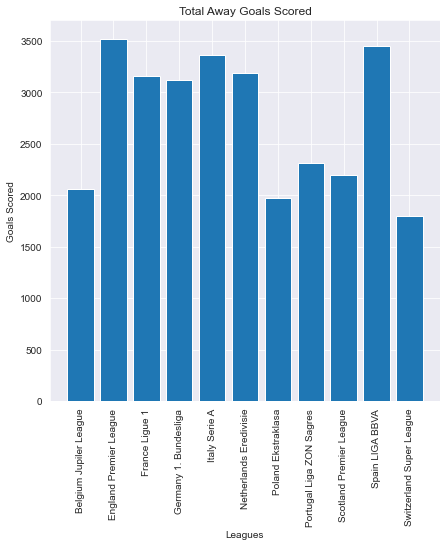

In [77]:
bar_plot(league, most_goals_away.away_team_goal, 'Total Away Goals Scored', 'Leagues', 'Goals Scored')

It is easier to see the highest goals using the plot. It is obvious still that the English Premier League had the highest away team goals.

<a id='conclusions'></a>
## Conclusions

from the results obtained by providing answers to the questions posed:
1. Śląsk Wrocław has the best build up play in any match from the data provided.
2. dos Santos Fabio Junior played most penalties (96), while Aaron Appindangoye played the least (2).
3. Most home goals were scored in the Spanish LIGA BBVA and the most away goals scored in the English Premier League.
4. Most players in general are right footed.

<a id='conclusions'></a>
## Limitations

1. The conclusiond made above are based on my understanding of the dataset used, thus they do not have any real life statistical implication as this is for learning purposes.
2. There are  a lot of inferences, questions and answers that can be drawn from the dataset used, but I was only able to carry out the analysis based on my knowledge.
3. Further statistical tests might be required to make final conclusions

## Thank you!!!